In [1]:
import re
import pandas as pd

In [2]:
dfT = pd.read_json('./data/df_tucholsky.json',lines=True)

ValueError: Expected object or value

In [4]:
dfT

,ids,year,title,text
0,tg1736.wmbd.0,1932,Der Floh,\n\n Der Floh\n\n...
1,tg1737.wg20.0,1932,Das Lied von der Gleichgültigkeit,\n\n Das Lied von...
2,tg1738.wjbn.0,1932,Fräulein Nietzsche,\n\n Fräulein Nie...
3,tg1739.wg1q.0,1932,Europa,\n\n Europa\n\n ...
4,tg1740.wgz7.0,1932,Zoologie,\n\n Zoologie\n\n...
...,...,...,...,...
1732,tg151.whmb.0,1917,Papiernot,\n\n Papiernot\n\...
1733,tg152.whkf.0,1917,Vorher!,\n\n Vorher!\n\n ...
1734,tg153.whfg.0,1917,Unterwegs 1915,\n\n Unterwegs 19...
1735,tg154.wnjn.0,1917,Die Einsiedlerschule,\n\n Die Einsiedl...


In [5]:
#dfT.text.apply(lambda x: textLength(x))

In [9]:
text.strip().startswith('Der')

True

In [26]:
titleM = dfT['title'].str.contains('Krieg') 
yearM = dfT['year'] > 1930

In [27]:
dfT[(titleM & yearM)]

,ids,year,title,text
36,tg1772.wn13.0,1932,Krieg gleich Mord,\n\n Krieg gleich...
536,tg1685.wfwb.0,1931,Der bewachte Kriegsschauplatz,\n\n Der bewachte...


In [7]:
dfT[dfT.title.str.contains('Krieg')]

,ids,year,title,text
36,tg1772.wn13.0,1932,Krieg gleich Mord,\n\n Krieg gleich...
291,tg415.whd1.0,1920,Kriegsandenken,\n\n Kriegsandenk...
375,tg1069.wn55.0,1927,Kopenhagener krabbeln auf ein Kriegsschiff,\n\n Kopenhagener...
392,tg1086.wg3r.0,1927,Der Krieg und die deutsche Frau,\n\n Der Krieg un...
432,tg1126.wmbq.0,1927,Französischer Kriegsfilm,\n\n Französische...
536,tg1685.wfwb.0,1931,Der bewachte Kriegsschauplatz,\n\n Der bewachte...
899,tg737.whq2.0,1925,Zwischen zwei Kriegen,\n\n Zwischen zwe...
1040,tg879.wk7b.0,1926,Waffe gegen den Krieg,\n\n Waffe gegen ...
1053,tg892.whzr.0,1926,"Wo waren Sie im Kriege, Herr -?",\n\n Wo waren Sie...
1166,tg142.wkp2.0,1916,Der Kriegslieferant,\n\n Der Kriegsli...


# Tucholskys output over the years

In [6]:
df1 = dfT.groupby('year').size()#.plot()

In [7]:
words = ['Weltbühne', 'Tucholsky', 'Panter', 'Hauser','Wrobel','Tiger']
dataframes = []
for word in words:
    dataframes.append(dfT[dfT.text.str.contains(word)].groupby('year').size())

In [8]:
len(dataframes)

6

In [9]:
dataframes[1]

year
1912     1
1913    11
1914    11
1917     1
1918     2
1919     4
1920     6
1921     3
1922     4
1924     2
1926     5
1927    13
1928     3
1929    18
1930     2
1931    10
1932     3
dtype: int64

In [10]:
dfRes = pd.concat(map(lambda x: x/df1, dataframes),axis=1).rename(columns={x:word for x,word in enumerate(words)})

In [12]:
dfRes.head(2)

,Weltbühne,Tucholsky,Panter,Hauser,Wrobel,Tiger
year,,,,,,
1907,NaN,NaN,NaN,NaN,NaN,NaN
1911,NaN,NaN,NaN,NaN,NaN,NaN


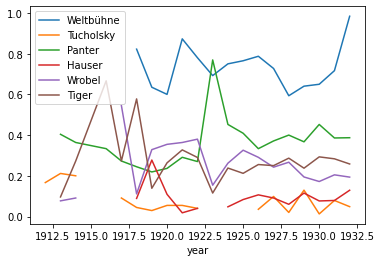

In [18]:
dfRes.plot()

In [38]:
dfT.groupby('year').get_group(1917)

,ids,year,title,text
1726,tg145.wk8j.0,1917,Die Sekt-Eule,\n\n Die Sekt-Eul...
1727,tg146.wjhd.0,1917,Meinen Freunden den Idealisten,\n\n Meinen Freun...
1728,tg147.wm8p.0,1917,Das grüne Gesicht,\n\n Das grüne Ge...
1729,tg148.wj3b.0,1917,Das Geheimnis des gelben Zimmers,\n\n Das Geheimni...
1730,tg149.wmb5.0,1917,An einen garnisondienstfähigen Dichter,\n\n An einen gar...
1731,tg150.wj6t.0,1917,Auf Urlaub,\n\n Auf Urlaub\n...
1732,tg151.whmb.0,1917,Papiernot,\n\n Papiernot\n\...
1733,tg152.whkf.0,1917,Vorher!,\n\n Vorher!\n\n ...
1734,tg153.whfg.0,1917,Unterwegs 1915,\n\n Unterwegs 19...
1735,tg154.wnjn.0,1917,Die Einsiedlerschule,\n\n Die Einsiedl...


In [28]:
tempVol = []
for i, g in dfT.groupby('year'):
    tempVol.append((i,g.shape[0]))

In [29]:
weltb = []
dfWeltb = dfT[dfT.text.str.contains('Weltbühne')]
for i, g in dfWeltb.groupby('year'):
    weltb.append((i,g.shape[0]))

In [30]:
dfTOutput = pd.DataFrame(tempVol).set_index(0)

In [31]:
dfWeltbOutput = pd.DataFrame(weltb).set_index(0)

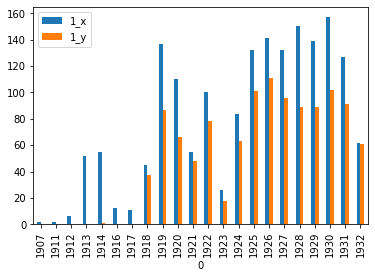

In [32]:
dfTOutput.merge(dfWeltbOutput,left_index=True,right_index=True,how='outer').plot.bar()

## How much did he write? 

Count words in each text, find the most common used words.

In [26]:
from collections import Counter

In [5]:
def textLength(row):
    return len(re.findall("\w+",row))

In [24]:
def countWords(row):
    allWords = re.findall("\w+",row)
    counts = Counter(allWords)
    total = len(allWords)
    resTemp = {k: v / total for k, v in counts.items()}
    res = {k: v for k, v in sorted(resTemp.items(), key=lambda item: item[1],reverse=True)}
    return res

In [6]:
dfT['textLength'] = dfT.text.apply(lambda row: textLength(row))

In [7]:
dfT

,ids,year,title,text,textLength
0,tg1736.wmbd.0,1932,Der Floh,\n\n Der Floh\n\n...,214
1,tg1737.wg20.0,1932,Das Lied von der Gleichgültigkeit,\n\n Das Lied von...,236
2,tg1738.wjbn.0,1932,Fräulein Nietzsche,\n\n Fräulein Nie...,2470
3,tg1739.wg1q.0,1932,Europa,\n\n Europa\n\n ...,257
4,tg1740.wgz7.0,1932,Zoologie,\n\n Zoologie\n\n...,94
...,...,...,...,...,...
1732,tg151.whmb.0,1917,Papiernot,\n\n Papiernot\n\...,170
1733,tg152.whkf.0,1917,Vorher!,\n\n Vorher!\n\n ...,670
1734,tg153.whfg.0,1917,Unterwegs 1915,\n\n Unterwegs 19...,2501
1735,tg154.wnjn.0,1917,Die Einsiedlerschule,\n\n Die Einsiedl...,1533


In [27]:
dfT['wordOccurance'] = dfT.text.apply(lambda row: countWords(row))

In [32]:
#dfT.wordOccurance.iloc[23]

You can easily manipulate data and the view on it, simply change mean to median or sum.

In [14]:
#dfT[['year','textLength']]

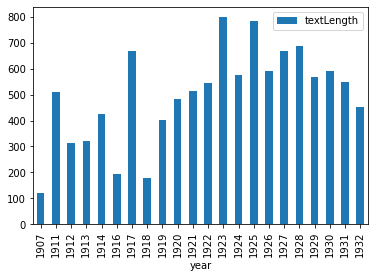

In [23]:
dfT[['year','textLength']].groupby('year').median().plot.bar()

What happend in 1912, 1927, 1931?

In [35]:
print(dfT[dfT.year == 1931].text.iloc[2])



                              Viel zu fein!

                              Ein Millionär trat einst ein Pekinesen-Hündchen. Und entschuldigte sich beim Besitzer. Da rief der Mann: »Was! Sie wollen ein Millionär sein und rufen nicht; ›Bringen Sie mir noch ein Hündchen‹!«

Es ist schon ein bißchen besser geworden, aber der Film und mancher Romanautor, sie könnens nicht lassen: es ist bei ihnen alles viel zu fein.
Die gnädigen Frauen nehmen ihre Schokolade in einer spitzenüberrieselten Liebesgondel, die Tassen sind innen mit Seide ausgeschlagen, das Stubenmädchen ist so schön wie . . . (nach Belieben auszufüllen);  vorn stehen Diener, hinten stehen Diener, und in der Mitte stehn Silberdiener; Rechtsanwälte gehen in Paquinmodellen auf den Ball und Halbweltdamen nur im Frack ins Bett . . . oder habe ich das verwechselt – kurz: es ist alles so fein, daß man sich ordentlich nach einer richtigen Schmalzenstulle sehnt. Warum ist es so fein –?
 Der Wunschtraum – ich weiß schon.
 Ja, mit dem Wu

In [49]:
dfT.to_hdf('./data/df_tucholsky_meta.hd5','tucholsky_meta')

/home/mvogl/Dokumente/GMPG/Lehre/Books-as-knowledge-reservoirs/env/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['ids', 'title', 'text', 'wordOccurance'], dtype='object')]

  encoding=encoding,
